In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/02_heart_disease_preprocessed.csv')
df.head(25)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150.0,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108.0,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129.0,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187.0,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172.0,0,1.4,0,0,1,0
5,56,1,1,120,236,0,0,178.0,0,0.8,0,0,1,0
6,62,0,3,140,268,0,2,160.0,0,3.6,2,2,1,1
7,57,0,3,120,354,0,0,163.0,1,0.6,0,0,1,0
8,63,1,3,130,254,0,2,147.0,0,1.4,1,1,3,1
9,53,1,3,140,203,1,2,155.0,1,3.1,2,0,3,1


## Chi-square test

Is done on original features ( without encoding or standardizing) because it assess the relationship between raw original categories and the original target.


In [3]:
from sklearn.feature_selection import chi2, SelectKBest

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

selector = SelectKBest(score_func=chi2, k='all')
selector.fit(df[categorical_features], df['target'])

p_values = selector.pvalues_

chi2_results = pd.DataFrame({'feature': categorical_features, 'p_value': p_values})
chi2_results = chi2_results.sort_values(by='p_value', ascending=True)

display(chi2_results)

,feature,p_value
6,ca,4.667726e-20
7,thal,2.335529e-10
4,exang,6.886243e-10
1,cp,2.515476e-06
5,slope,2.771374e-06
3,restecg,3.279787e-03
0,sex,6.404399e-03
2,fbs,6.848935e-01


## Feature importance (random forest)



,feature,importance
7,thalach,0.139043
2,cp,0.126374
12,thal,0.120990
11,ca,0.114422
9,oldpeak,0.090120
0,age,0.086017
4,chol,0.079396
3,trestbps,0.069139
8,exang,0.059727
10,slope,0.053657


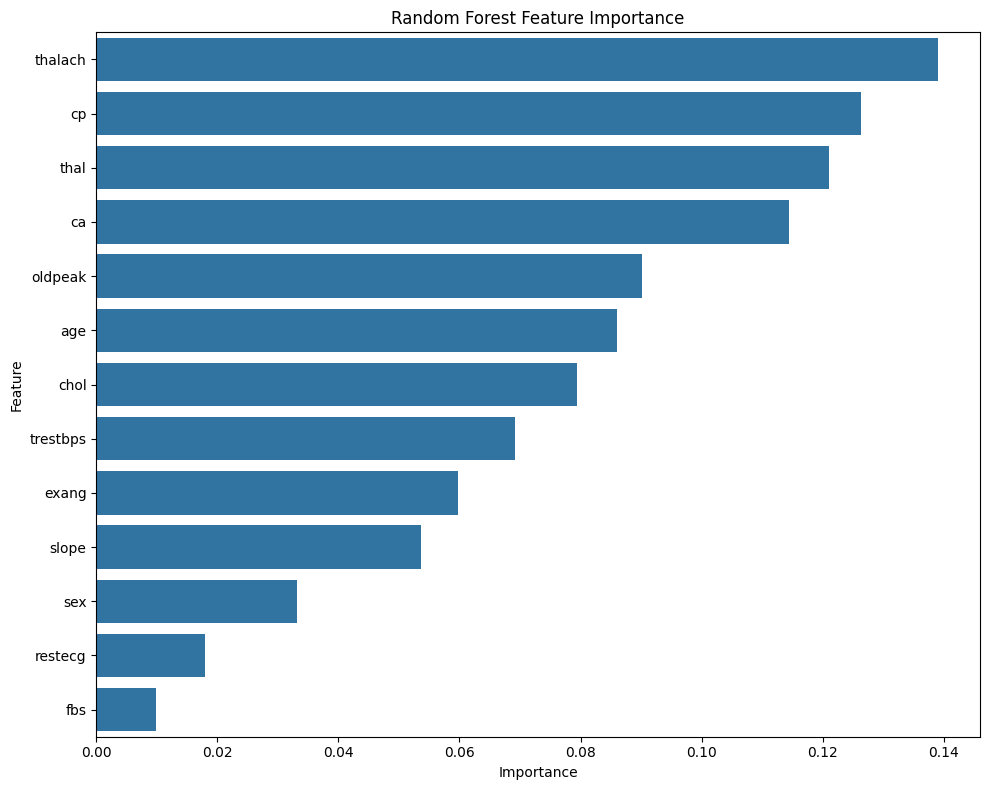

In [6]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop('target', axis=1)
y = df['target']

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

display(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Recursive feature elimination (RFE)


Applying RFE with a suitable estimator (e.g., Logistic Regression or a tree-based model) on the processed features to select a subset of features.


,feature,ranking,selected
1,sex,1,True
2,cp,1,True
6,restecg,1,True
5,fbs,1,True
7,thalach,1,True
10,slope,1,True
9,oldpeak,1,True
8,exang,1,True
12,thal,1,True
11,ca,1,True


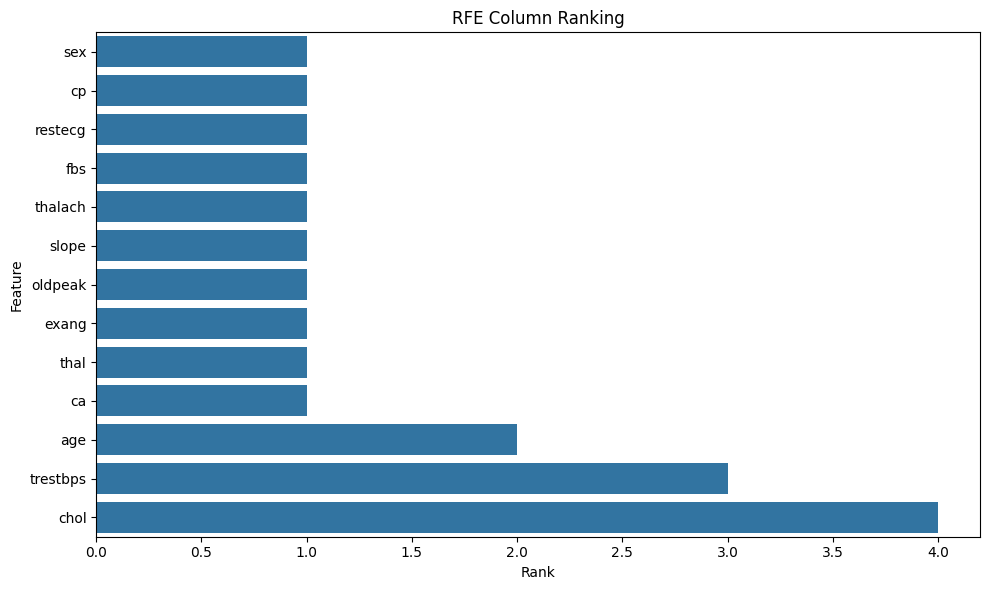

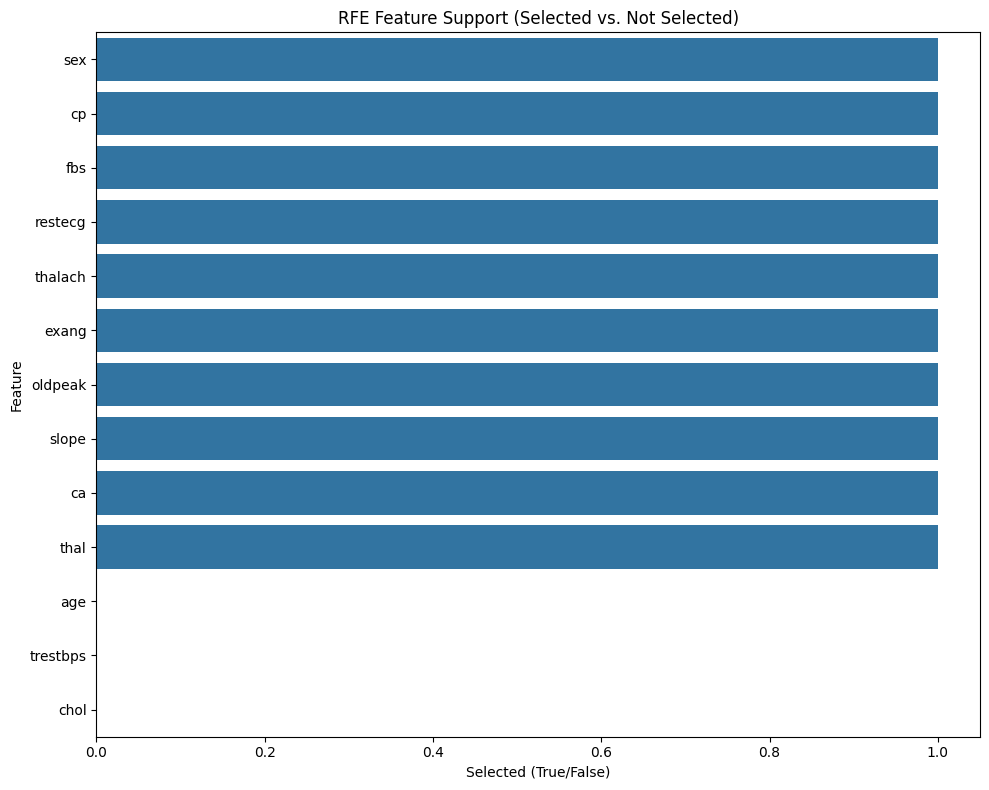

In [7]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

estimator = LogisticRegression(solver='liblinear', random_state=42)

# Select the top 10 features
rfe = RFE(estimator=estimator, n_features_to_select=10)

# Fit RFE to the processed data
rfe.fit(X, y)

# Get the ranked features and support (selection)
feature_ranking = rfe.ranking_
feature_support = rfe.support_

# Create a DataFrame for RFE results
rfe_results_df = pd.DataFrame({
    'feature': X.columns,
    'ranking': feature_ranking,
    'selected': feature_support
})

# Sort by rank for the ranking plot
rfe_results_df_ranked = rfe_results_df.sort_values(by='ranking')

# Display the RFE results
display(rfe_results_df_ranked)

# Plot the column ranking
plt.figure(figsize=(10, 6))
sns.barplot(x='ranking', y='feature', data=rfe_results_df_ranked, orient='h')
plt.title('RFE Column Ranking')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Sort by selection for the support plot (optional, can also sort by feature name)
rfe_results_df_supported = rfe_results_df.sort_values(by='selected', ascending=False)

# Plot the feature support (selected vs. not selected)
plt.figure(figsize=(10, 8))
sns.barplot(x='selected', y='feature', data=rfe_results_df_supported, orient='h')
plt.title('RFE Feature Support (Selected vs. Not Selected)')
plt.xlabel('Selected (True/False)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Combine and analyze results


Combining the results from the Chi-Square test, Feature Importance, and RFE to identify the most relevant features.


In [8]:
combined_results = chi2_results.merge(feature_importance_df, on='feature', how='left')
combined_results = combined_results.merge(rfe_results_df, on='feature', how='left')

display(combined_results.head())

,feature,p_value,importance,ranking,selected
0,ca,4.667726e-20,0.114422,1,True
1,thal,2.335529e-10,0.120990,1,True
2,exang,6.886243e-10,0.059727,1,True
3,cp,2.515476e-06,0.126374,1,True
4,slope,2.771374e-06,0.053657,1,True


In [15]:
X.drop(columns=['fbs'])
display(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.9 KB


None

# One-Hot Encoding & Standardizing using a pipline
The columns to apply One-Hot Encoding to are:
`sex`,`cp`,`restecg`,`exang`,`slope`,`ca`,`thal`

The columns to apply Standardization to are:
`age`, `trestbps`,`chol`,`thalach`,`oldpeak`

In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target = 'target'

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [17]:
X_processed = preprocessor.fit_transform(X)

print("original features:", X.shape)
print("processed features:", X_processed.shape)

original features: (303, 13)
processed features: (303, 26)


In [18]:
onehot_features = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
processed_column_names = numerical_features + onehot_features

X_processed_df = pd.DataFrame(X_processed, columns=processed_column_names)

# Ensure consistent column order by reindexing
X_processed_df = X_processed_df[processed_column_names]

display(X_processed_df.head())

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,0.948726,0.821446,-0.265040,0.015306,0.809005,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.392002,1.723905,0.851214,-1.835388,0.017949,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.392002,-0.682652,-0.349285,-0.910041,1.105651,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.932564,-0.081013,0.093004,1.645679,1.995590,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.489288,-0.081013,-0.875820,0.984717,-0.080933,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


#🔽Saving the new refined dataset

In [22]:
processed_df = X_processed_df.copy()
processed_df['target'] = y.values
display(processed_df.head())
display(processed_df.info())
processed_df.to_csv('03_heart_disease_refined.csv', index=False)

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3,target
0,0.948726,0.821446,-0.265040,0.015306,0.809005,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1.392002,1.723905,0.851214,-1.835388,0.017949,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
2,1.392002,-0.682652,-0.349285,-0.910041,1.105651,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,-1.932564,-0.081013,0.093004,1.645679,1.995590,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,-1.489288,-0.081013,-0.875820,0.984717,-0.080933,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   trestbps   303 non-null    float64
 2   chol       303 non-null    float64
 3   thalach    303 non-null    float64
 4   oldpeak    303 non-null    float64
 5   sex_0      303 non-null    float64
 6   sex_1      303 non-null    float64
 7   cp_0       303 non-null    float64
 8   cp_1       303 non-null    float64
 9   cp_2       303 non-null    float64
 10  cp_3       303 non-null    float64
 11  restecg_0  303 non-null    float64
 12  restecg_1  303 non-null    float64
 13  restecg_2  303 non-null    float64
 14  exang_0    303 non-null    float64
 15  exang_1    303 non-null    float64
 16  slope_0    303 non-null    float64
 17  slope_1    303 non-null    float64
 18  slope_2    303 non-null    float64
 19  ca_0       303 non-null    float64
 20  ca_1      

None

## Summary:

### Data Analysis Key Findings

*   The Chi-Square test indicated that original categorical features such as `ca`, `thal`, `exang`, `cp`, and `slope` have a statistically significant relationship with the target variable (low p-values), while `fbs` appears independent (high p-value).
*   Random Forest feature importance highlighted `ca_0`, `thalach`, and `thal_1` as the most important processed features. Other highly ranked features included `age`, `cp_3`, `thal_3`, and `oldpeak`.
*   Recursive Feature Elimination (RFE) selected a subset of processed features, including one-hot encoded components related to `sex`, `cp`, `restecg`, `ca`, `slope`, `exang`, and `thal`, indicating their relevance according to the Logistic Regression estimator.
*   Combining the insights from all three methods allowed for the identification of features that consistently demonstrated importance or were selected across different techniques. Features related to `age`, `thalach`, `oldpeak`, `chol`, `trestbps` (numerical) and `sex`, `cp`, `restecg`, `exang`, `slope`, `ca`, `thal` (categorical, considering their one-hot encoded parts) were frequently identified as relevant.


